In [1]:
!/bin/bash ./setup.sh

SageMaker instance route table setup is ok. We are good to go.
SageMaker instance routing for Docker is ok. We are good to go!


In [2]:
import sagemaker

sagemaker_session = sagemaker.Session()

role = sagemaker.get_execution_role()

In [3]:
from sagemaker.predictor import RealTimePredictor, json_deserializer

class ImagePredictor(RealTimePredictor):
    def __init__(self, endpoint_name, sagemaker_session):
        super(ImagePredictor, self).__init__(endpoint_name, sagemaker_session=sagemaker_session, serializer=None, 
                                            deserializer=json_deserializer, content_type='image/jpeg')

In [4]:
from sagemaker.pytorch import PyTorchModel

# Configure an PyTorch Model
pytorch_model = PyTorchModel(model_data='s3://sagemaker-934676248949-eu-west-1/models/caltech256_fastai_sagemaker/model.tar.gz', 
                                source_dir='source',
                                entry_point='app.py',
                                role=role,
                                predictor_cls=ImagePredictor)

# In Local Mode, fit will pull the PyTorch container docker image and run it locally
predictor = pytorch_model.deploy(instance_type='local', initial_instance_count=1)

INFO:sagemaker:Creating model with name: sagemaker-pytorch-2018-06-28-23-14-42-691
INFO:sagemaker:Creating endpoint with name sagemaker-pytorch-2018-06-28-23-14-42-691


Attaching to tmp_z_l31qr_algo-1-D47CJ_1
Creating tmp_z_l31qr_algo-1-D47CJ_1 ... 
algo-1-D47CJ_1  | [2018-06-28 23:14:46 +0000] [18] [INFO] Starting gunicorn 19.8.1
algo-1-D47CJ_1  | [2018-06-28 23:14:46 +0000] [18] [INFO] Listening at: unix:/tmp/gunicorn.sock (18)
algo-1-D47CJ_1  | [2018-06-28 23:14:46 +0000] [18] [INFO] Using worker: gevent
algo-1-D47CJ_1  | [2018-06-28 23:14:46 +0000] [25] [INFO] Booting worker with pid: 25
algo-1-D47CJ_1  | /usr/local/lib/python3.5/dist-packages/gunicorn/workers/ggevent.py:65: MonkeyPatchWarning: Monkey-patching ssl after ssl has already been imported may lead to errors, including RecursionError on Python 3.6. Please monkey-patch earlier. See https://github.com/gevent/gevent/issues/1016
algo-1-D47CJ_1  |   monkey.patch_all(subprocess=True)
algo-1-D47CJ_1  | [2018-06-28 23:14:46 +0000] [26] [INFO] Booting worker with pid: 26
algo-1-D47CJ_1  | [2018-06-28 23:14:46 +0000] [30] [INFO] Booting worker with pid: 30
algo-1-D47CJ_1  | /usr/local/lib/python3.

algo-1-D47CJ_1  | Installing collected packages: app
algo-1-D47CJ_1  | 
algo-1-D47CJ_1  |   Removing source in /tmp/pip-install-ogrblu80/app
algo-1-D47CJ_1  | Successfully installed app-1.0.0
algo-1-D47CJ_1  | Cleaning up...
algo-1-D47CJ_1  | 1 location(s) to search for versions of pip:
algo-1-D47CJ_1  | * https://pypi.org/simple/pip/
algo-1-D47CJ_1  | Getting page https://pypi.org/simple/pip/
algo-1-D47CJ_1  | Looking up "https://pypi.org/simple/pip/" in the cache
algo-1-D47CJ_1  | Current age based on date: 2317452
algo-1-D47CJ_1  | Freshness lifetime from max-age: 600
algo-1-D47CJ_1  | Freshness lifetime from request max-age: 600
algo-1-D47CJ_1  | Starting new HTTPS connection (1): pypi.org
algo-1-D47CJ_1  | https://pypi.org:443 "GET /simple/pip/ HTTP/1.1" 304 0
algo-1-D47CJ_1  | Analyzing links from page https://pypi.org/simple/pip/
algo-1-D47CJ_1  |   Found link https://files.pythonhosted.org/packages/3d/9d/1e313763bdfb6a48977b65829c6ce2a43eaae29ea2f907c8bbef024a7219/pip-0.2.tar.g

!algo-1-D47CJ_1  | 172.18.0.1 - - [28/Jun/2018:23:14:49 +0000] "GET /ping HTTP/1.1" 200 0 "-" "-"


In [5]:
import io
import requests
from PIL import Image

In [6]:
IMG_URL='http://www.vision.caltech.edu/Image_Datasets/Caltech256/images/010.beer-mug/010_0011.jpg'
#IMG_URL='http://www.vision.caltech.edu/Image_Datasets/Caltech256/images/002.american-flag/002_0019.jpg'
#IMG_URL='http://www.vision.caltech.edu/Image_Datasets/Caltech256/images/038.chimp/038_0009.jpg'

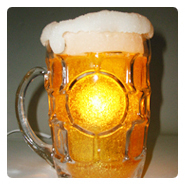

In [7]:
response = requests.get(IMG_URL)
img_pil = Image.open(io.BytesIO(response.content))
img_pil

In [8]:
# Serializes data and makes a prediction request to the local endpoint
response = predictor.predict(response.content)

algo-1-D47CJ_1  | 2018-06-28 23:14:59,221 app          INFO     Deserializing the input data.
algo-1-D47CJ_1  | 2018-06-28 23:14:59,221 app          INFO     Processing jpeg image.
algo-1-D47CJ_1  | 2018-06-28 23:14:59,240 app          INFO     Returning image as PyTorch Variable.
algo-1-D47CJ_1  | 2018-06-28 23:14:59,241 app          INFO     Calling model
algo-1-D47CJ_1  | /usr/local/lib/python3.5/dist-packages/torch/nn/modules/container.py:91: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
algo-1-D47CJ_1  |   input = module(input)
algo-1-D47CJ_1  | 2018-06-28 23:14:59,659 app          INFO     Getting best prediction
algo-1-D47CJ_1  | 2018-06-28 23:14:59,660 app          INFO     Getting class and confidence score
algo-1-D47CJ_1  | 2018-06-28 23:14:59,660 app          INFO     {'class': '010.beer-mug', 'confidence': 0.9999873042106628}
algo-1-D47CJ_1  | 2018-06-28 23:14:59,660 app          INFO     Seriali